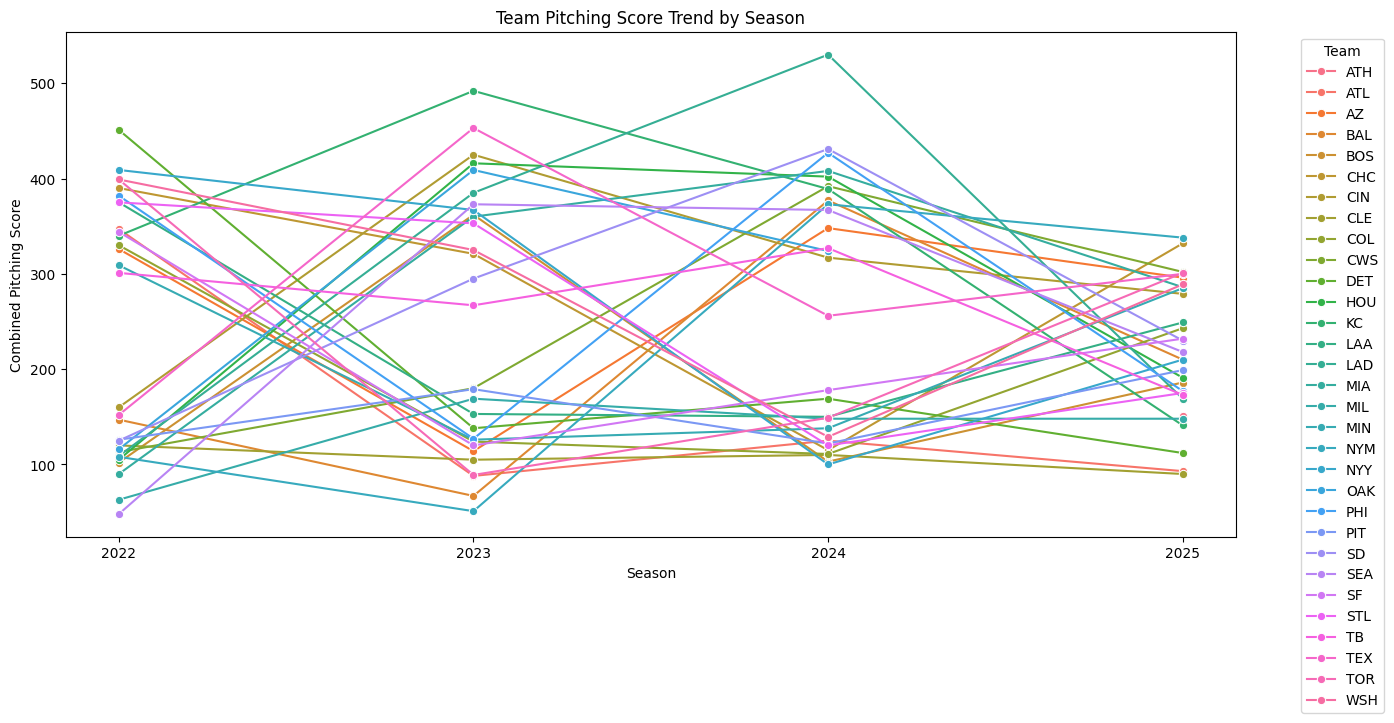

In [1]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Load seasonal pitching scores
df = pd.read_csv("../data/processed/team_seasonal_pitching_scores.csv")

# 🎨 Plot team pitching score over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='season', y='combined_score', hue='team', marker='o')

plt.title("Team Pitching Score Trend by Season")
plt.ylabel("Combined Pitching Score")
plt.xlabel("Season")
plt.xticks(df['season'].unique())
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


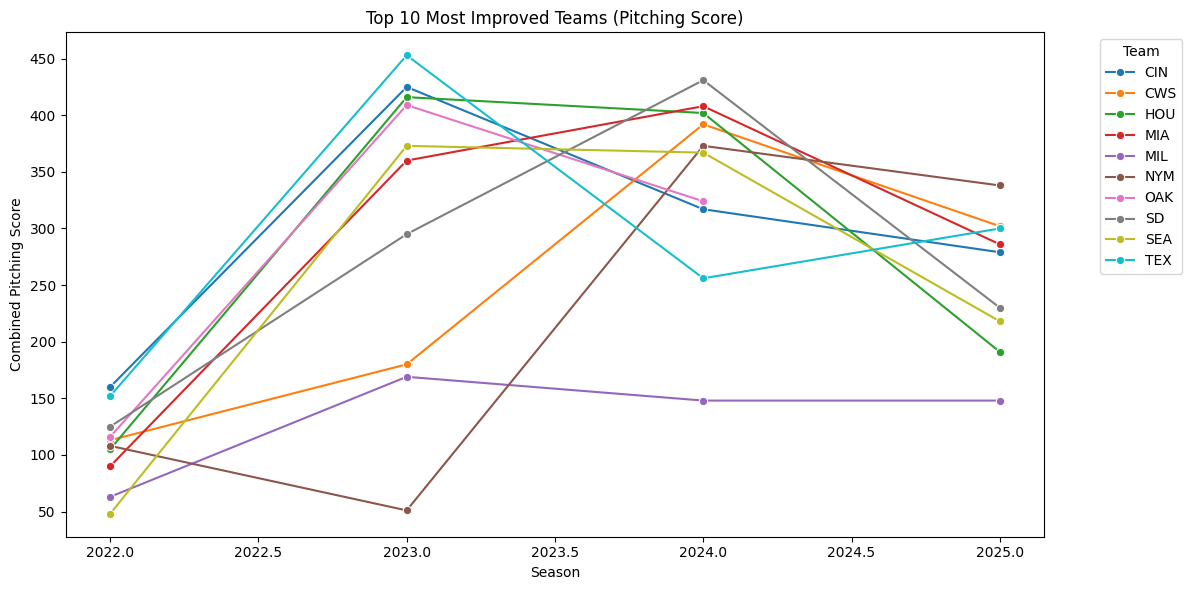

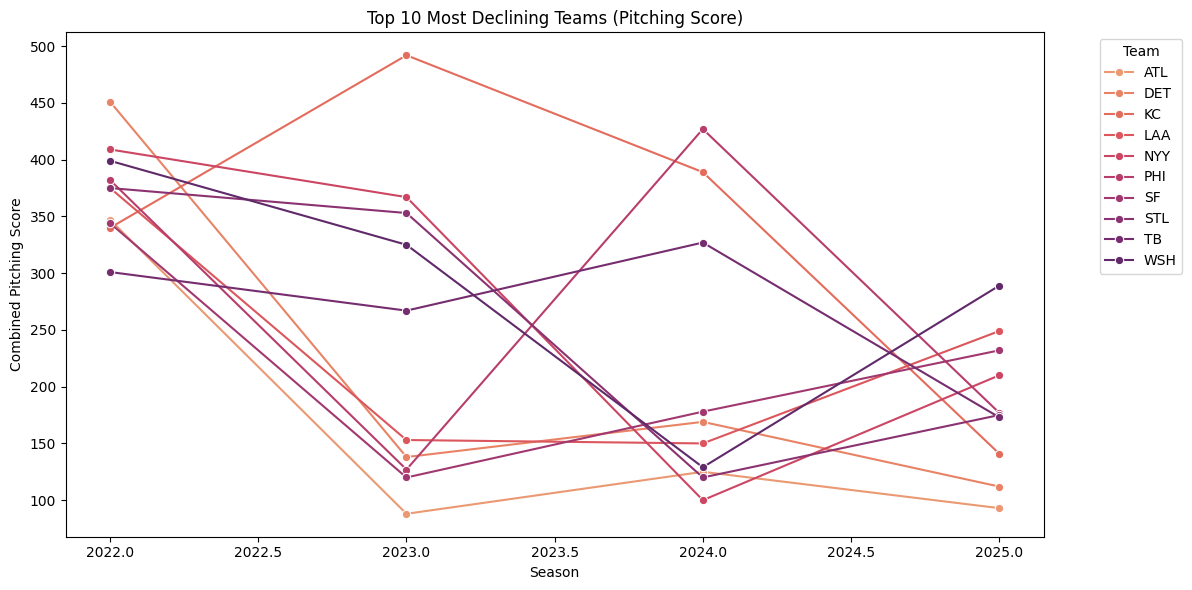

In [3]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("../reports/figures", exist_ok=True)


# 📁 Load data
df = pd.read_csv("../data/processed/team_seasonal_pitching_scores.csv")

# 🎯 Compute change in pitching score from first to last year per team
trend = (
    df.sort_values(['team', 'season'])
    .groupby('team')
    .agg(start_score=('combined_score', 'first'), end_score=('combined_score', 'last'))
    .reset_index()
)

trend['score_change'] = trend['end_score'] - trend['start_score']
trend = trend.sort_values('score_change', ascending=False)

# 🏆 Top 10 Most Improved
top_improving = trend.head(10)['team'].tolist()
# 🚨 Top 10 Declining
top_declining = trend.tail(10)['team'].tolist()

# 📊 Filter original data
df_top_improving = df[df['team'].isin(top_improving)]
df_top_declining = df[df['team'].isin(top_declining)]

# 🎨 Save Plot: Top 10 Most Improved Teams
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_improving, x='season', y='combined_score', hue='team', marker='o')
plt.title("Top 10 Most Improved Teams (Pitching Score)")
plt.ylabel("Combined Pitching Score")
plt.xlabel("Season")
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../reports/figures/top_10_improved_teams.png", dpi=300)
plt.show()

# 🎨 Save Plot: Top 10 Most Declining Teams
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_declining, x='season', y='combined_score', hue='team', marker='o', palette='flare')
plt.title("Top 10 Most Declining Teams (Pitching Score)")
plt.ylabel("Combined Pitching Score")
plt.xlabel("Season")
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../reports/figures/top_10_declining_teams.png", dpi=300)
plt.show()
